# Ajuste de parámetros a datos experimentales.  

## Overview 

A lo largo del este notebook se van a explorar tres técnicas de ajuste de datos, en particular se hará enfásis en mínimos cuadrados y un método no-lineal para determianr parámetros de modelos de crecimiento exponencial y lógistico. 

Los datos se pueden encontrar en [2], este conjunto de datos se generó para realizar un análisis de correlación entre la represión/supresión de genes en poblaciones de [_E. coli_](https://es.wikipedia.org/wiki/Escherichia_coli), variación del ambiente de las poblaciones y su crecimiento. Es decir, si modificar el DNA de E. coli puede hacer que cambien sus patrones de crecimiento en ambiente controlados. El objetivo del notebook no es una reproducción del análisis de correlación, sin embargo usaremos un par de hechos presentados en el artículo. De cualquier manera, se invita a indagar en los resultados presentados en [1].

## Gráficas, datos y python. 

El lenguaje de programación en el que desarrollaremos esta suerte de ejercicios es Python 3 (es reproducbile para kernel de Python >3.3) y se hará uso de las librerías [Matplolib](https://matplotlib.org/stable/gallery/) para visualización de datos, [Numpy](https://numpy.org/doc/stable/user/absolute_beginners.html) para manejo de datos y operaciones algebraicas, y [Pandas](https://pandas.pydata.org/docs/user_guide/index.html) para la carga y el manejo de bases de datos. 

Se comenzará importando estas librerías a Python:

In [41]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Lo siguiente que realizaremos será leer la información de nuestras bases de datos.

In [42]:
df_lb = pd.read_csv(filepath_or_buffer = 'E. coli growth curve data by strain for LB (rich medium) - No.2 (n=12).csv')

Para revisar que la data se cargó de manera correcta podemos hacer una inspección del encabezado (primeras n-filas) o de la cola (últimas n-filas) del _dataframe_:

In [43]:
df_lb.head()

,time (h),No 2-1,No 2-2,No 2-3,No 2-4,No 2-5,No 2-6,No 2-7,No 2-8,No 2-9,No 2-10,No 2-11,No 2-12
0,1,0.001,0.002,0.002,0.009,0.001,0.001,0.000,0.001,-0.001,-0.001,0.000,-0.001
1,2,0.003,0.004,0.004,0.011,0.003,0.003,0.000,0.001,0.000,0.000,0.000,-0.001
2,3,0.010,0.011,0.011,0.019,0.009,0.010,0.001,0.002,0.001,0.001,0.001,0.000
3,4,0.031,0.030,0.033,0.041,0.029,0.032,0.004,0.004,0.003,0.003,0.004,0.003
4,5,0.082,0.080,0.087,0.095,0.081,0.087,0.013,0.011,0.012,0.013,0.013,0.012


In [44]:
df_lb.tail()

,time (h),No 2-1,No 2-2,No 2-3,No 2-4,No 2-5,No 2-6,No 2-7,No 2-8,No 2-9,No 2-10,No 2-11,No 2-12
19,20,1.119,1.150,1.102,1.167,1.110,1.167,1.067,1.062,1.068,1.106,1.070,1.109
20,21,1.127,1.158,1.112,1.172,1.119,1.173,1.064,1.055,1.059,1.110,1.059,1.109
21,22,1.129,1.156,1.113,1.169,1.120,1.171,1.055,1.044,1.050,1.104,1.061,1.107
22,23,1.137,1.162,1.122,1.174,1.127,1.176,1.060,1.044,1.054,1.112,1.073,1.119
23,24,1.140,1.165,1.124,1.174,1.129,1.174,1.063,1.041,1.059,1.117,1.082,1.126


Cargemos el resto de bases:

In [45]:
df_m63 = pd.read_csv(filepath_or_buffer = 'E. coli growth curve data by strain for M63 (minimal medium) - No.4 (n=12).csv')
df_maa = pd.read_csv(filepath_or_buffer = 'E. coli growth curve data by strain for MAA (M63 supplied with 20 amino acids) - No.1 (n=12).csv')

Revisemos de nuevo los datos:

In [46]:
df_m63.head()

,time (h),No 4-1,No 4-2,No 4-3,No 4-4,No 4-5,No 4-6,No 4-7,No 4-8,No 4-9,No 4-10,No 4-11,No 4-12
0,1,0.000,0.001,0.001,-0.001,-0.001,-0.002,-0.003,-0.002,-0.001,0.000,0.000,0.000
1,2,0.001,0.003,0.002,0.001,0.001,0.000,-0.003,-0.002,-0.001,0.000,0.000,0.001
2,3,0.003,0.005,0.003,0.002,0.002,0.002,-0.002,-0.002,-0.001,0.000,0.000,0.001
3,4,0.007,0.008,0.007,0.006,0.005,0.005,-0.002,-0.001,0.000,0.001,0.001,0.001
4,5,0.012,0.014,0.012,0.011,0.010,0.011,-0.001,-0.001,0.001,0.001,0.002,0.002


In [47]:
df_maa.tail()

,time (h),No 1-1,No 1-2,No 1-3,No 1-4,No 1-5,No 1-6,No 1-7,No 1-8,No 1-9,No 1-10,No 1-11,No 1-12
19,20,1.078,1.089,1.060,1.084,1.040,1.090,1.032,1.071,1.046,1.070,1.015,1.079
20,21,1.091,1.107,1.075,1.103,1.055,1.106,1.038,1.095,1.048,1.096,1.034,1.099
21,22,1.096,1.116,1.082,1.111,1.063,1.114,1.029,1.097,1.039,1.094,1.038,1.099
22,23,1.106,1.130,1.092,1.126,1.075,1.127,1.030,1.103,1.039,1.101,1.039,1.108
23,24,1.113,1.138,1.097,1.134,1.080,1.134,1.030,1.108,1.035,1.108,1.042,1.119


Ahora, hablemos un poco de los datos, tenemos los siguientes tres dataframes:
* `df_lb`: Datos de crecimiento de E. coli en pozos -tubos de ensayo- individuales con un [medio Luria-Bertani](https://en.wikipedia.org/wiki/Lysogeny_broth), este es un medio rico en elementos de crecimiento como péptidos, vitaminas -aquí destacan las B-, sulfuro, magnesio, nitrógeno y minerales. 
* `df_m63`: Datos de crecimiento de E. Coli en diferentes pozos con un medio [M63](https://www.biobasic.com/us/m63-medium#:~:text=Product%20Description%3A%20M63%20Medium%3A%20M63,source%20and%20an%20energy%20source.) que a diferencia del LB no tiene vitaminas y tiene glucosa y glicerol. También contiene nitrógeno, fósforo, magnesio y trazas de metales. 
* `df_maa`: Datos de crecimiento de E. Coli en diferentes pozos con un medio M63 enriquecido con péptidos. 

Ya que cada pozo, para cada medio, tiene la misma densidad inicial de E. coli, ddeberíamos de ver curvas de crecimiento similares entre los distintos pozos, mientras que entre distintos medios deberíamos ver que el pozo se satura a distintos valores y además la fase exponencial se alcanza más rápido o menos rápido.  

Vamos a visualziar nuestros datos:

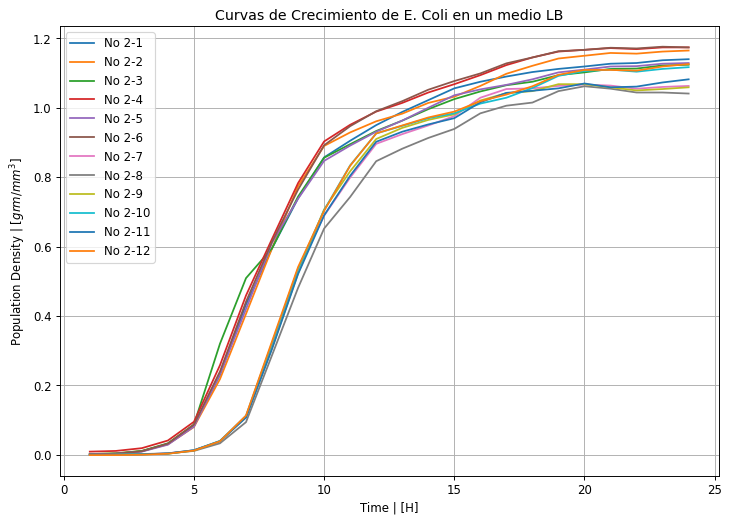

In [48]:
fig, ax = plt.subplots(1,1,dpi=85,figsize=(10,7))
df_lb.set_index('time (h)').plot(kind = 'line', ax = ax)
ax.set(xlabel='Time | [H]',ylabel=r'Population Density | [$grm/mm^3$]',title='Curvas de Crecimiento de E. Coli en un medio LB')
ax.grid(True)
plt.show()

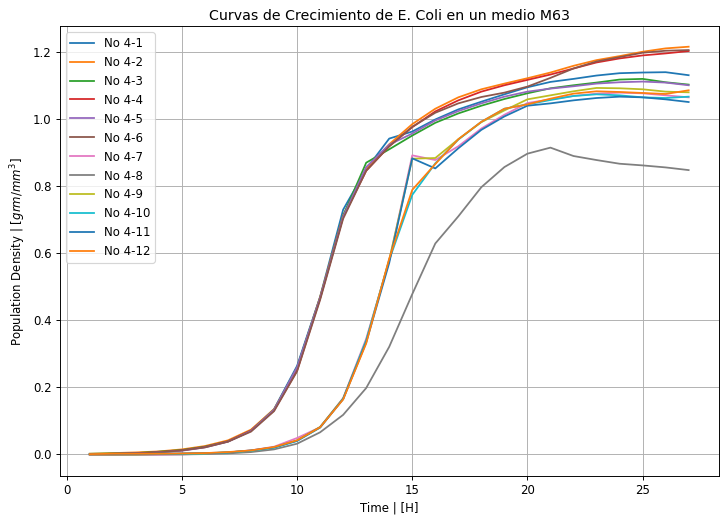

In [49]:
fig, ax = plt.subplots(1,1,dpi=85,figsize=(10,7))
df_m63.set_index('time (h)').plot(kind = 'line', ax = ax)
ax.set(xlabel='Time | [H]',ylabel=r'Population Density | [$grm/mm^3$]',title='Curvas de Crecimiento de E. Coli en un medio M63')
ax.grid(True)
plt.show()

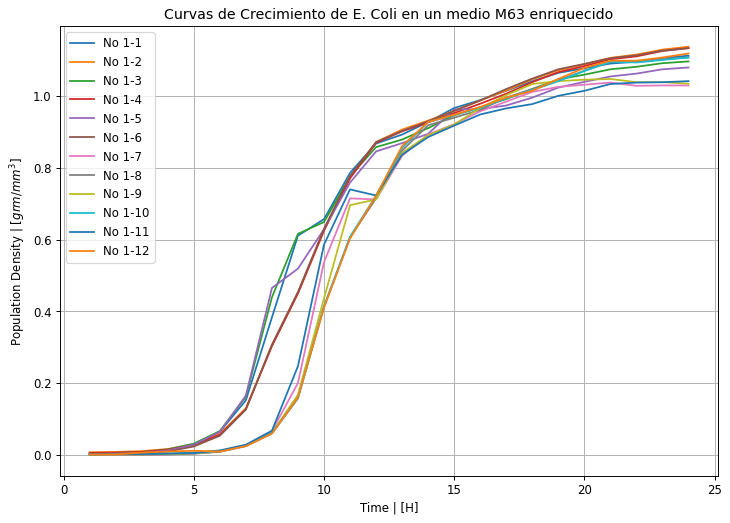

In [50]:
fig, ax = plt.subplots(1,1,dpi=85,figsize=(10,7))
df_maa.set_index('time (h)').plot(kind = 'line', ax = ax)
ax.set(xlabel='Time | [H]',ylabel=r'Population Density | [$grm/mm^3$]',title='Curvas de Crecimiento de E. Coli en un medio M63 enriquecido')
ax.grid(True)
plt.show()

Ahora, es de notar que las curvas entre entre pozos de cada medio tiene comportamientos similares. En lugar de hacer un modelo que ajuste a todas las columnas al mismo tiempo -que sí es posible, es decir, encontrar el mejor modelo que ajuste lo mejor posible a todas las curvas- vamos a obtener una _curva representativa_ de cada uno de los experimentos entre todos los pozos para cada medio. 

Para realizar lo anterior vamos a usar el _promedio_ como [estadistico](https://economipedia.com/definiciones/estadistico.html) sobre el tiempo, esto reducira las doce columnas a solamente una. Notemos que podemos usar otros estadísticos como el mínimo, máximo o algún cuartil. Se invita reproducir este ejericio usando otros estadísticos ¿Tiene sentido? ¿Por qué sería válido?

A continuación se va a calcular la curva representativa para los experimentos en LB:

In [51]:
cr_lb = df_lb.set_index('time (h)').mean(axis=1)

In [52]:
cr_lb.head()

time (h)
1    0.001167
2    0.002333
3    0.006333
4    0.018083
5    0.048833
dtype: float64

Veamos cómo se ve esta curva comparada con el resto de pozos. 

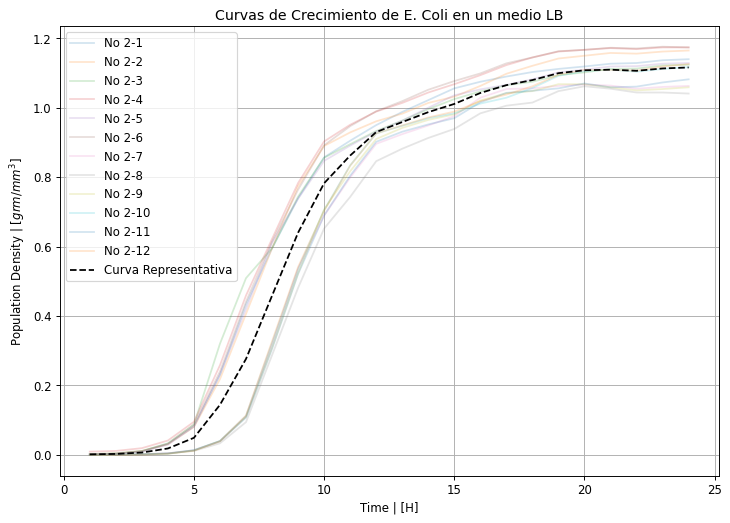

In [61]:
fig, ax = plt.subplots(1,1,dpi=85,figsize=(10,7))
df_lb.set_index('time (h)').plot(kind = 'line', alpha = 0.2, ax = ax,)
cr_lb.plot(kind='line',label='Curva Representativa', style='--',color='k', ax = ax)
ax.set(xlabel='Time | [H]',ylabel=r'Population Density | [$grm/mm^3$]',title='Curvas de Crecimiento de E. Coli en un medio LB')
ax.grid(True)
ax.legend()
plt.show()

Para fines prácticos diremos que esta curva representa el comportamiento de todos los pozos en promeedio, o dicho de otra manera, representa el crecimiento en promedio de la población en el medio LB. Esta es la curva que vamos a tratar de modelar. 

Ahora realizaremos lo mismo para los otros medios:

In [62]:
cr_m63 = df_m63.set_index('time (h)').mean(axis=1)
cr_maa = df_maa.set_index('time (h)').mean(axis=1)

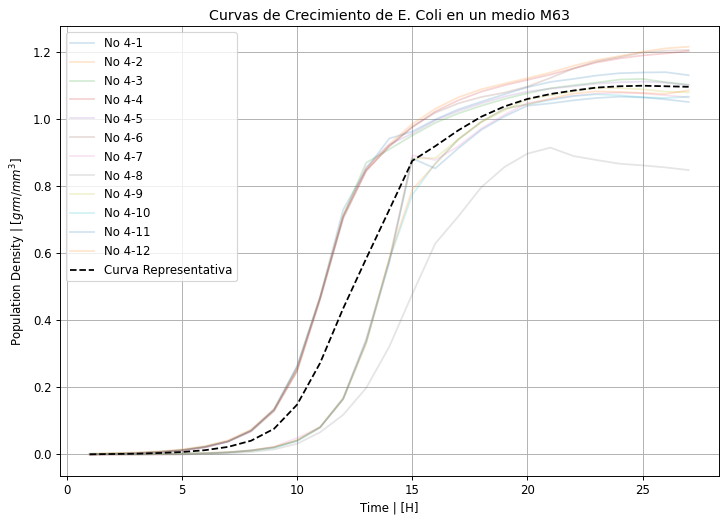

In [63]:
fig, ax = plt.subplots(1,1,dpi=85,figsize=(10,7))
df_m63.set_index('time (h)').plot(kind = 'line', alpha = 0.2, ax = ax,)
cr_m63.plot(kind='line',label='Curva Representativa', style='--',color='k', ax = ax)
ax.set(xlabel='Time | [H]',ylabel=r'Population Density | [$grm/mm^3$]',title='Curvas de Crecimiento de E. Coli en un medio M63')
ax.grid(True)
ax.legend()
plt.show()

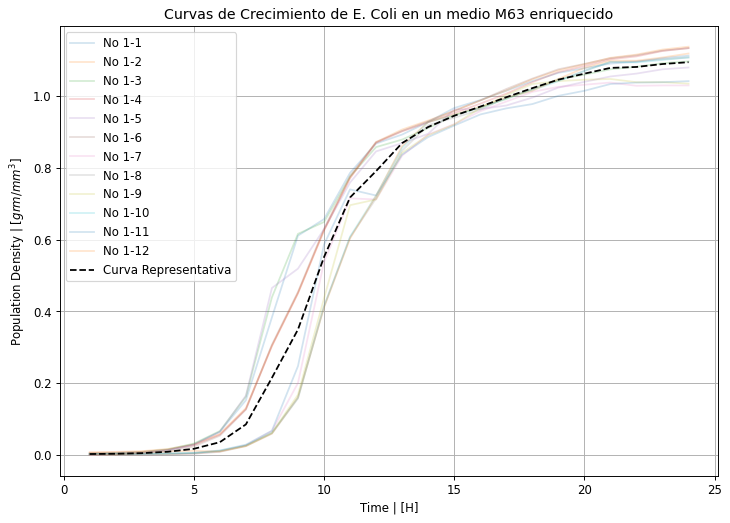

In [64]:
fig, ax = plt.subplots(1,1,dpi=85,figsize=(10,7))
df_maa.set_index('time (h)').plot(kind = 'line', alpha = 0.2, ax = ax,)
cr_maa.plot(kind='line',label='Curva Representativa', style='--',color='k', ax = ax)
ax.set(xlabel='Time | [H]',ylabel=r'Population Density | [$grm/mm^3$]',title='Curvas de Crecimiento de E. Coli en un medio M63 enriquecido')
ax.grid(True)
ax.legend()
plt.show()

Es de notar que, además de reducir los datos a solamente una curva por cada medio, el promedio ayudó a _suavizar_ los picos en las curvas de crecimiento entre pozos.  

Ahora bien, por completez, es de notar que ahora es posible comparar las curvas representativas entre los medios:

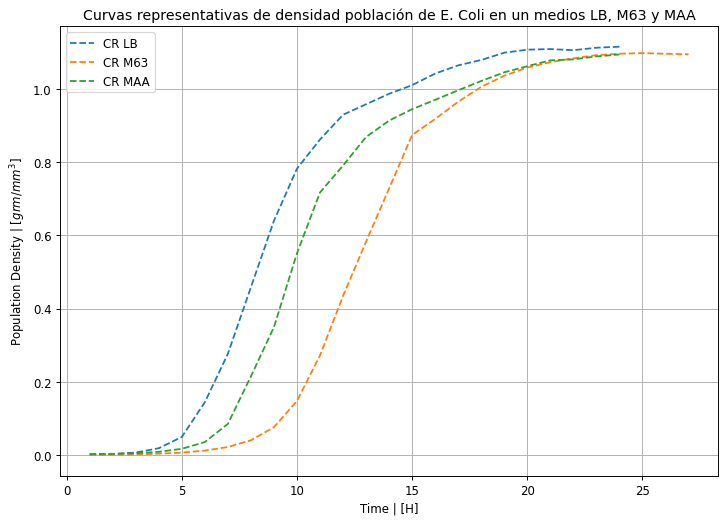

In [66]:
fig, ax = plt.subplots(1,1,dpi=85,figsize=(10,7))
cr_lb.plot(kind='line',label='CR LB', style='--', ax = ax)
cr_m63.plot(kind='line',label='CR M63', style='--', ax = ax)
cr_maa.plot(kind='line',label='CR MAA', style='--', ax = ax)
ax.set(xlabel='Time | [H]',ylabel=r'Population Density | [$grm/mm^3$]',title='Curvas representativas de densidad población de E. Coli en un medios LB, M63 y MAA')
ax.grid(True)
ax.legend()
plt.show()

¿Qué población crece más rápido?

## Un primer ajuste de datos

Ahora que ya es posible cargar datos, gráficar y se obtuvieron curvas representativas, ahora vamos a realizar el primero de los ajustes. Podemos pensar que este es el más ingenuo de los métodos. Esto es, usar un modelo exponencial y usar las derivadas para aproximar un parámetro. 

Recordemos que el modelo de crecimiento exponencial es el siguiente:
$$
x' = ax
$$
Donde $x(t)$ es una función que representa la densidad de población al tiempo $t$. 

Notemos también que nuestros datos son realmente una serie de tiempo donde para cada hora idetificamos una densidad de población $p_{i}$. Usemos como ejemplo la `cr_lb`. En los gráficos anteriores parece que hay un continuo para la realiadad es que no es una línea continua sino más bien una interpolación de puntos discretos a una línea. Más bien se debería de ver como a continuación:

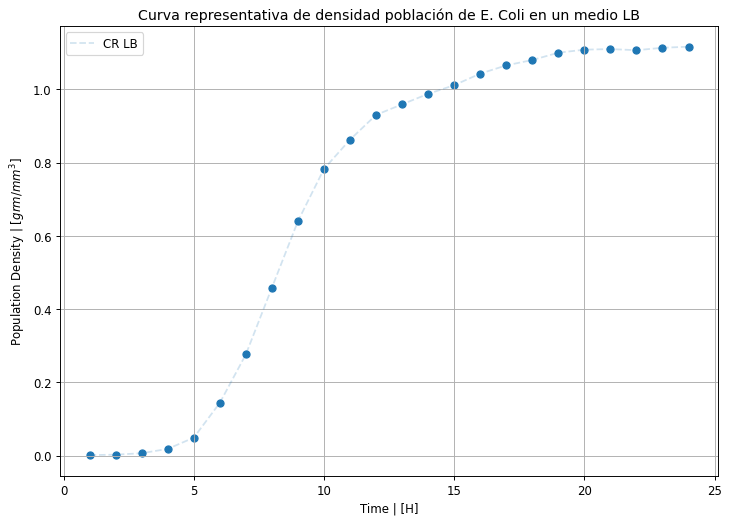

In [78]:
fig, ax = plt.subplots(1,1,dpi=85,figsize=(10,7))
cr_lb.plot(kind='line',label='CR LB', style='--', alpha=0.2, ax = ax)
ax.scatter(x=cr_lb.index.to_numpy(),y=cr_lb.to_numpy())
ax.set(xlabel='Time | [H]',ylabel=r'Population Density | [$grm/mm^3$]',title='Curva representativa de densidad población de E. Coli en un medio LB')
ax.grid(True)
ax.legend()
plt.show()

Ahora que ya esta la idea de que no es una curva continua sino un conjunto de puntos entonces podemos aproximar la derivada como la diferencia entre puntos consecutivos. Es decir, si $p_{i}$, $p_{i+1}$ son dos puntos consecutivos medidos en tiempos $t_{i}$,$t_{i+1}$, respectivamente, entonces la derivada la podemos aproximar como:
$$
\frac{dp}{dt} \approx \frac{\Delta p}{\Delta t} = \frac{p_{i+1} - p_{i}}{t_{i+1} - t_{i}}
$$
Notemos que entre más separadas estén las observaciones menos precisa será la aproximación.

Ahora, esto es importante porque en nuestro modelo más sencillo es necesario estimar el parámetro de crecimiento $a$. Usando la aporximación anterior podemos, partiendo de $x' = a x$, que:

$$
ax_{i+1} \approx \frac{x_{i+1} - x_{i}}{t_{i+1} - t_{i}} \qquad \implies \qquad a \approx \frac{x_{i+1} - x_{i}}{t_{i+1} - t_{i}} \frac{1}{x_{i+1}}
$$

Y así podemos entonces estimar el valor de $a$. Realizaremos la aproximación para `cr_lb` y se invita a explorar para el resto de curvas representativas.

In [89]:
x0 = cr_lb.to_numpy()[0]
x1 = cr_lb.to_numpy()[1]

t0 = cr_lb.index.to_numpy()[0]
t1 = cr_lb.index.to_numpy()[1]

a = ((x1-x0)/(t1-t0))*(1/x1)

print("El valor de a = {}".format(a))

El valor de a = 0.5


Ahora, recordemos que la solución de la ecuación diferencial $x' = ax$ es la siguiente:
$$
x(t) = x_{0}\exp{at} = x_{0}e^{at}
$$
Ya tenemos el valor de $a$ y el de $x_0$, vamos a generar puntos entre 0 y 25 H, posterior lo compararemos con la curva representativa.

In [96]:
model_time = np.linspace(0,15,100)
model = [x0*np.exp(a*t) for t in model_time]

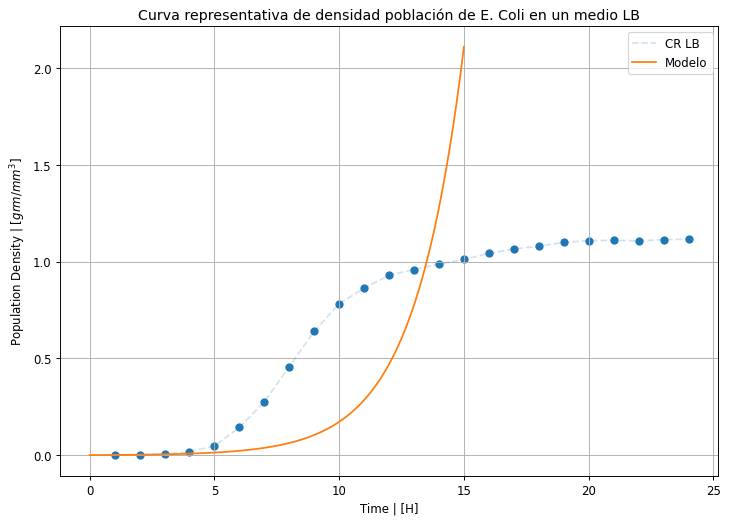

In [97]:
fig, ax = plt.subplots(1,1,dpi=85,figsize=(10,7))
cr_lb.plot(kind='line',label='CR LB', style='--', alpha=0.2, ax = ax)
ax.scatter(x=cr_lb.index.to_numpy(),y=cr_lb.to_numpy())
ax.plot(model_time,model,label='Modelo')
ax.set(xlabel='Time | [H]',ylabel=r'Population Density | [$grm/mm^3$]',title='Curva representativa de densidad población de E. Coli en un medio LB')
ax.grid(True)
ax.legend()
plt.show()

Pareciera -este pareciera luego veremos cómo calcularlo- que la curva ajusta a los primeros datos pero notablemente despuñes de cinco horas el modelo se desvía. Intentaremos darle más información, al parámetro $a$, no solamente los primeros dos puntos sino los primeros tres. 

In [124]:
x0 = cr_lb.to_numpy()[0]
x1 = cr_lb.to_numpy()[1]
x2 = cr_lb.to_numpy()[2]

t0 = cr_lb.index.to_numpy()[0]
t1 = cr_lb.index.to_numpy()[1]
t2 = cr_lb.index.to_numpy()[2]

a = np.mean([((x1-x0)/(t1-t0))*(1/x1),((x2-x1)/(t2-t1))*(1/x2)])
print("El nuevo valor de a = {}".format(a))

El nuevo valor de a = 0.5657894736842106


In [125]:
model_time = np.linspace(0,10,100)
model = [x0*np.exp(a*t) for t in model_time]

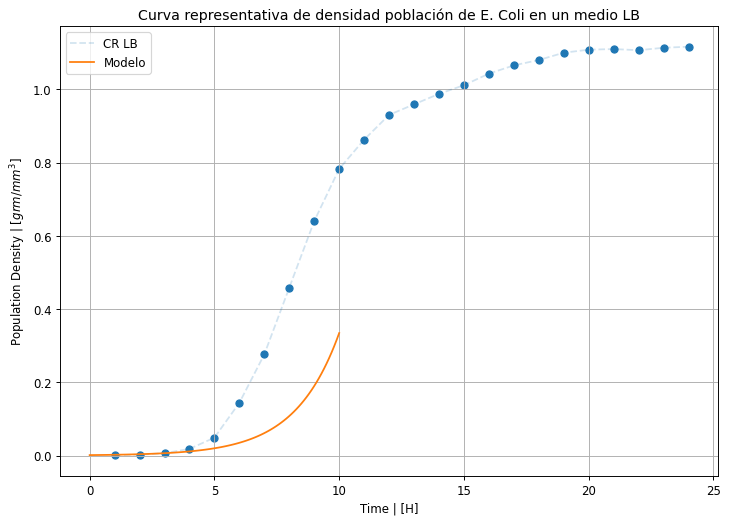

In [126]:
fig, ax = plt.subplots(1,1,dpi=85,figsize=(10,7))
cr_lb.plot(kind='line',label='CR LB', style='--', alpha=0.2, ax = ax)
ax.scatter(x=cr_lb.index.to_numpy(),y=cr_lb.to_numpy())
ax.plot(model_time,model,label='Modelo')
ax.set(xlabel='Time | [H]',ylabel=r'Population Density | [$grm/mm^3$]',title='Curva representativa de densidad población de E. Coli en un medio LB')
ax.grid(True)
ax.legend()
plt.show()

Parece que confome más valores de a calculamos y promediamos más se ajusta la curva sin embargo, realizando una exploración en los parámetros notaremos que no importa cuánto crezca el parámetro habrá un punto donde el modelo y los datos son irreconciliables. Esto nos habla de que debemos buscar otro tipo de modelo. 

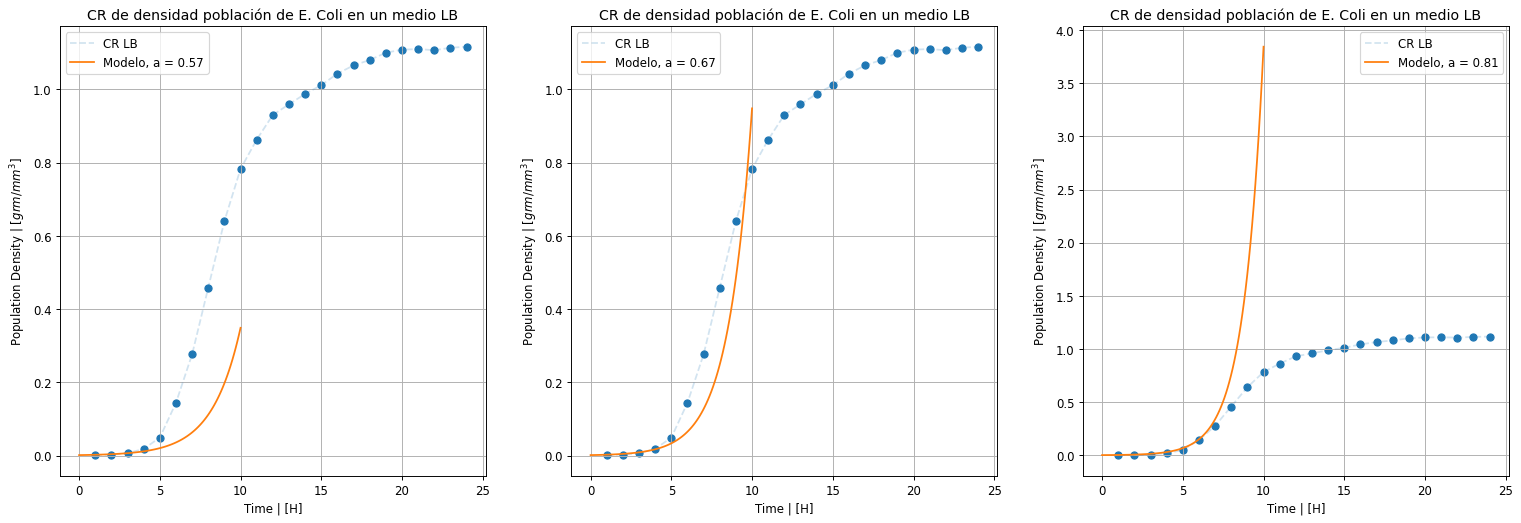

In [132]:
model_time = np.linspace(0,10,100)
x0 = 0.0011666666666666665

fig, ax = plt.subplots(1,3,dpi=85,figsize=(22,7))

for i,a in enumerate([0.57,0.67,0.81]):
    cr_lb.plot(kind='line',label='CR LB', style='--', alpha=0.2, ax = ax[i])
    ax[i].scatter(x=cr_lb.index.to_numpy(),y=cr_lb.to_numpy())
    ax[i].plot(model_time,[x0*np.exp(a*t) for t in model_time],label='Modelo, a = {}'.format(a))
    ax[i].set(xlabel='Time | [H]',ylabel=r'Population Density | [$grm/mm^3$]',title='CR de densidad población de E. Coli en un medio LB')
    ax[i].grid(True)
    ax[i].legend()


plt.show()

# Referencias 

1. Kurokawa, M. et al. (2016) “Correlation between genome reduction and bacterial growth,” DNA Research, 23(6), pp. 517–525. Available at: https://doi.org/10.1093/dnares/dsw035. 

2. Kurokawa, Masaomi; Ying, Bei-Wen (2018): Growth data of the E. coli strains carrying the reduced genomes. figshare. Dataset. https://doi.org/10.6084/m9.figshare.5918608.v1 